## $$ Session-17 - Project-05$$

Problem Statement: 
Pick up the following stocks and generate forecasts accordingly 
 Stocks: 
1. NASDAQ.AAPL 
2. NASDAQ.ADP 
3. NASDAQ.CBOE 
4. NASDAQ.CSCO 
5. NASDAQ.EBAY 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import statsmodels.api as sm
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
# from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller,pacf,acf
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
#plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### Pick up the following stocks and generate forecasts accordingly

In [3]:
stock_features =['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
col_list = ['DATE'] + stock_features
df1 = df[col_list]
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 6 columns):
DATE           41266 non-null int64
NASDAQ.AAPL    41266 non-null float64
NASDAQ.ADP     41266 non-null float64
NASDAQ.CBOE    41266 non-null float64
NASDAQ.CSCO    41266 non-null float64
NASDAQ.EBAY    41266 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


In [5]:
df1 =df1.copy()
df1['DATE'] =  pd.to_datetime(df1['DATE'],unit='s')
# stock_data['DATE'] = pd.to_datetime(stock_data['DATE'],unit='s')

In [6]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [7]:
df1 = df1.copy()
df1['Month'] = df1['DATE'].dt.date

In [8]:
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,Month
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975,2017-04-03
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950,2017-04-03
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100,2017-04-03
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350,2017-04-03
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000,2017-04-03


In [9]:
col_list = ['Month']+ stock_features
df2 = df1[col_list]
df2.head()

,Month,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03,143.6600,102.0600,81.12,33.8400,33.4000


In [10]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.160,144.640,149.9450,155.065,164.51
NASDAQ.ADP,41266.0,103.480398,4.424244,95.870,101.300,102.4400,104.660,121.77
NASDAQ.CBOE,41266.0,89.325485,5.746178,80.000,84.140,89.3150,93.850,101.35
NASDAQ.CSCO,41266.0,32.139336,0.985571,30.365,31.455,31.7733,32.790,34.49
NASDAQ.EBAY,41266.0,34.794506,1.099296,31.890,34.065,34.7700,35.610,37.46


In [11]:
final = df2.copy()
final['Month']=pd.to_datetime(final['Month'])

### Time Series Forecasting for NASDAQ.AAPL

In [12]:
df_AAPL = final[['Month',stock_features[0]]]

In [13]:
df_AAPL.head()

,Month,NASDAQ.AAPL
0,2017-04-03,143.6800
1,2017-04-03,143.7000
2,2017-04-03,143.6901
3,2017-04-03,143.6400
4,2017-04-03,143.6600


In [14]:
df_AAPL.set_index('Month',inplace=True)
df_AAPL.head()

,NASDAQ.AAPL
Month,
2017-04-03,143.6800
2017-04-03,143.7000
2017-04-03,143.6901
2017-04-03,143.6400
2017-04-03,143.6600


In [15]:
df_AAPL.index

DatetimeIndex(['2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03', '2017-04-03', '2017-04-03',
               '2017-04-03', '2017-04-03',
               ...
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31', '2017-08-31', '2017-08-31',
               '2017-08-31', '2017-08-31'],
              dtype='datetime64[ns]', name='Month', length=41266, freq=None)

#### Summary Statistics

In [16]:
df_AAPL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.16,144.64,149.945,155.065,164.51


#### Step 2 : Visualize the Data

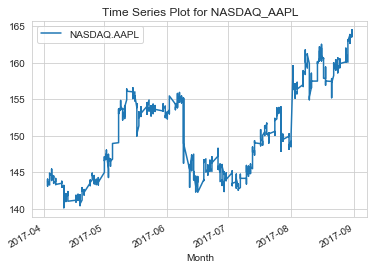

In [17]:
import seaborn as sns
sns.set_style('whitegrid')
df_AAPL.plot()
plt.title('Time Series Plot for NASDAQ_AAPL')
plt.show()

#### Plotting Rolling Statistics and check for stationarity :
    
The function will plot the moving mean or moving Standard Deviation. This is still visual method

In [18]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(timeseries)
    print('\nAugmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    for k,v in result[4].items():
        print('Crtical {} : value {}'.format(k,v))
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

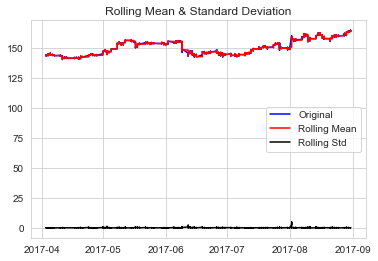


Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9128532997926717
p-value : 0.783710177261385
#Lags Used : 31
Number of Observations Used : 41234
Crtical 1% : value -3.4305085998723857
Crtical 5% : value -2.8616100975579815
Crtical 10% : value -2.5668073106689477
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
test_stationarity(df_AAPL['NASDAQ.AAPL'])

#### Note:
This is not stationary because : mean is increasing even though the std is small, Test stat is > critical value.
• Note: the signed values are compared and the absolute values.

### MAKING THE TIME SERIES STATIONARY
There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

#### Differencing

The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

#### First Difference 

In [20]:
df_AAPL = df_AAPL.copy()
df_AAPL.loc[:,'First_Difference'] = df_AAPL['NASDAQ.AAPL'] - df_AAPL['NASDAQ.AAPL'].shift(1)

In [21]:
df_AAPL.head()

,NASDAQ.AAPL,First_Difference
Month,,
2017-04-03,143.6800,NaN
2017-04-03,143.7000,0.0200
2017-04-03,143.6901,-0.0099
2017-04-03,143.6400,-0.0501
2017-04-03,143.6600,0.0200


In [22]:
df_AAPL = df_AAPL.copy()
df_AAPL.dropna(inplace=True)

#### Test Staionarity

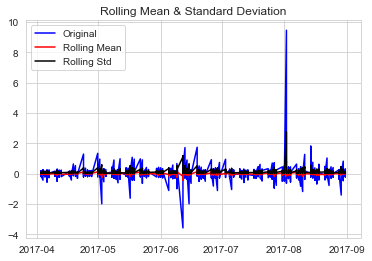


Augmented Dickey-Fuller Test:
ADF Test Statistic : -35.73774148340136
p-value : 0.0
#Lags Used : 30
Number of Observations Used : 41234
Crtical 1% : value -3.4305085998723857
Crtical 5% : value -2.8616100975579815
Crtical 10% : value -2.5668073106689477
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
test_stationarity(df_AAPL['First_Difference'])

#### Seasonal Decomposition

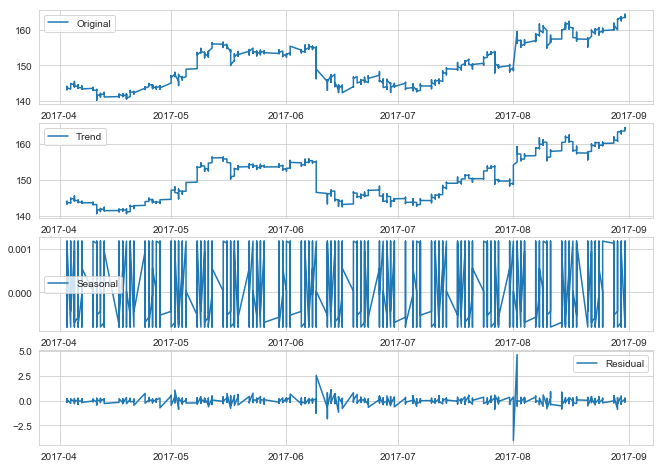

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_AAPL['NASDAQ.AAPL'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_AAPL['NASDAQ.AAPL'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

#### Note:
The data is seasonal as interpreted from the Seasonal plot of seasonal decomposition.

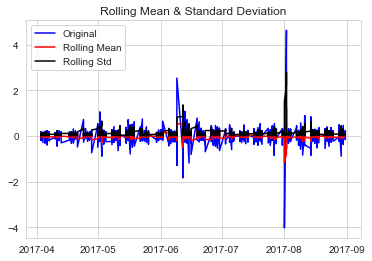


Augmented Dickey-Fuller Test:
ADF Test Statistic : -43.04343353554122
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41197
Crtical 1% : value -3.4305087423235587
Crtical 5% : value -2.861610160516496
Crtical 10% : value -2.566807344180027
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [25]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

#### Note :
This is stationary because:

• test statistic is lower than critical values.

• the mean and std variations have small variations with time.

### Autocorrelation and Partial Autocorrelation Plots

#### Autocorrelation Interpretation
The actual interpretation and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use for the ARIMA model. Our main priority here is to try to figure out whether we will use the AR or MA components for the ARIMA model (or both!) as well as how many lags we should use. In general you would use either AR or MA, using both is less common.

* If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

* If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms

<Figure size 1440x576 with 0 Axes>

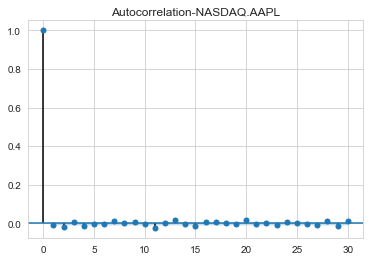

In [26]:
plt.figure(figsize=(20,8))
fig_first = plot_pacf(df_AAPL["First_Difference"],lags=30,title='Autocorrelation-NASDAQ.AAPL')

<Figure size 1440x576 with 0 Axes>

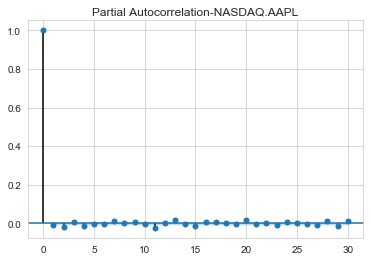

In [27]:
plt.figure(figsize=(20,8))
fig_pacf_first = plot_pacf(df_AAPL["First_Difference"],lags=30,title='Partial Autocorrelation-NASDAQ.AAPL')

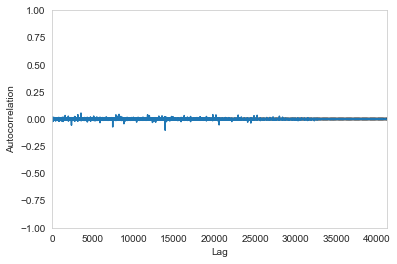

In [28]:
autocorrelation_plot(df_AAPL['First_Difference'])

#### Forecasting a Time Series

#### Auto Regressive Integrated Moving Average(ARIMA) —

It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .

Let me explain these dependent parameters:

• p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• d :This is the number of differences or the number of non-seasonal differences .

Now let’s check out on how we can figure out what value of p and q to use. We use two popular plotting techniques; they are:

• Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

• Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p).

In [29]:
# import statsmodels.api as sm
# from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
# from statsmodels.tsa.stattools import acf, pacf
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

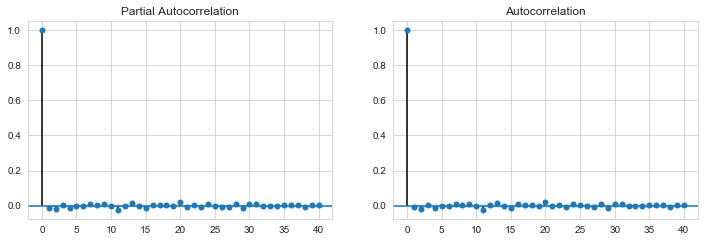

In [30]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_acf(df_AAPL['First_Difference'].iloc[30:], lags=40, ax=ax1)
ax2 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_pacf(df_AAPL['First_Difference'].iloc[30:], lags=40, ax=ax2)

In [31]:
lag_acf = acf(df_AAPL['First_Difference'],nlags=80)
lag_pacf = pacf(df_AAPL['First_Difference'],nlags=80,method='ols')

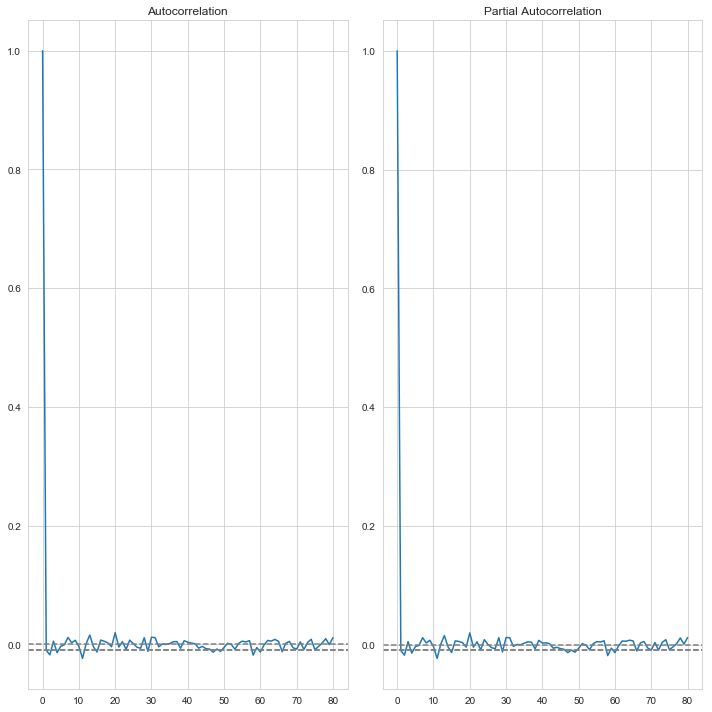

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_AAPL['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

plt.tight_layout()

#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:

• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.

• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.

### Using the Seasonal ARIMA model

In [33]:
model= sm.tsa.statespace.SARIMAX(df_AAPL['NASDAQ.AAPL'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               24925.552
Date:                            Mon, 08 Apr 2019   AIC                         -49849.104
Time:                                    23:26:42   BIC                         -49840.476
Sample:                                         0   HQIC                        -49846.377
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0175   4.57e-06   3828.755      0.000       0.017       0.017
Ljung-Box (Q):                    1

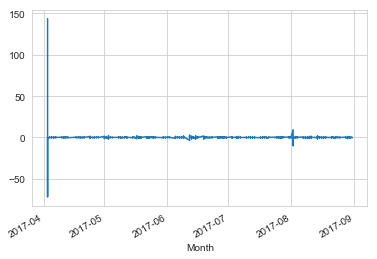

In [34]:
results.resid.plot()

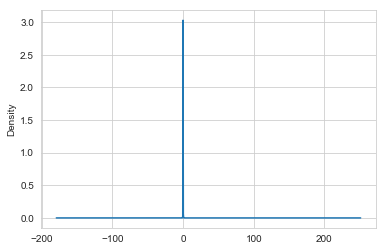

In [35]:
results.resid.plot(kind='kde')

In [36]:
df_AAPL = df_AAPL.copy()
df_AAPL['Forecast'] = results.predict()

In [37]:
df_AAPL.head()

,NASDAQ.AAPL,First_Difference,Forecast
Month,,,
2017-04-03,143.7000,0.0200,0.0000
2017-04-03,143.6901,-0.0099,143.7000
2017-04-03,143.6400,-0.0501,143.6901
2017-04-03,143.6600,0.0200,143.6400
2017-04-03,143.7800,0.1200,143.6600


### Prediction of Future Values

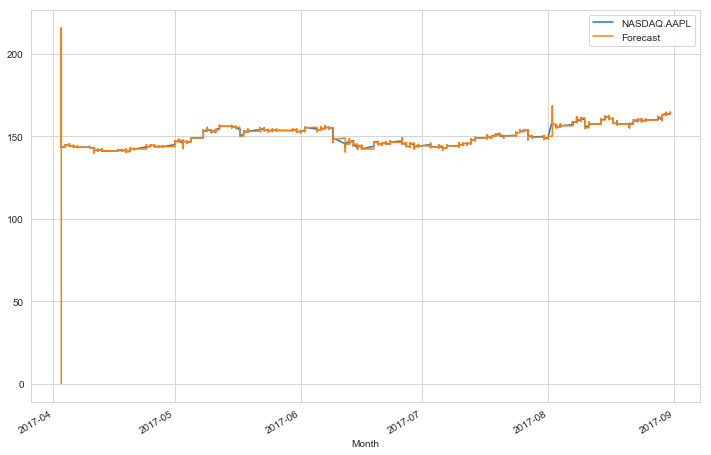

In [38]:
df_AAPL[['NASDAQ.AAPL','Forecast']].plot(figsize=(12,8))

In [39]:
results.forecast(steps=10)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    163.960
41266    163.935
41267    163.910
41268    163.810
41269    163.940
41270    163.950
41271    163.890
41272    163.860
41273    163.870
41274    163.760
dtype: float64

In [40]:
results.predict(start=41264,end=41274)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    163.930
41265    163.960
41266    163.935
41267    163.910
41268    163.810
41269    163.940
41270    163.950
41271    163.890
41272    163.860
41273    163.870
41274    163.760
dtype: float64

### Accuracy of the Forecast using MSE-Mean Squared Error

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_AAPL['NASDAQ.AAPL'],df_AAPL['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.6426408212319417
Mean Absolute Error NASDAQ.AAPL - 0.07550728223695313


### Time Series Forecasting for NASDAQ.ADP

In [42]:
df_ADP = final[['Month',stock_features[1]]]

In [43]:
df_ADP.head()

,Month,NASDAQ.ADP
0,2017-04-03,102.2300
1,2017-04-03,102.1400
2,2017-04-03,102.2125
3,2017-04-03,102.1400
4,2017-04-03,102.0600


In [44]:
df_ADP.set_index('Month',inplace=True)
df_ADP.head()

,NASDAQ.ADP
Month,
2017-04-03,102.2300
2017-04-03,102.1400
2017-04-03,102.2125
2017-04-03,102.1400
2017-04-03,102.0600


### Visualize Data 

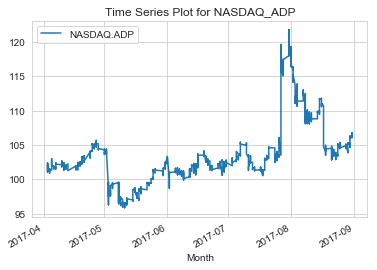

In [45]:
df_ADP.plot()
plt.title('Time Series Plot for NASDAQ_ADP')
plt.show()

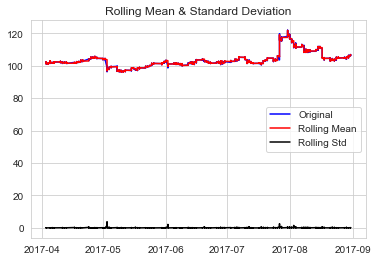


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.7041735251574581
p-value : 0.42896344420669535
#Lags Used : 39
Number of Observations Used : 41226
Crtical 1% : value -3.4305086306509716
Crtical 5% : value -2.861610111161057
Crtical 10% : value -2.5668073179094897
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [46]:
test_stationarity(df_ADP['NASDAQ.ADP'])


### MAKING THE TIME SERIES STATIONARY

#### Differencing

In [47]:
df_ADP = df_ADP.copy()
df_ADP['First_Difference'] = df_ADP['NASDAQ.ADP'] - df_ADP['NASDAQ.ADP'].shift(1)

In [48]:
df_ADP.head()

,NASDAQ.ADP,First_Difference
Month,,
2017-04-03,102.2300,NaN
2017-04-03,102.1400,-0.0900
2017-04-03,102.2125,0.0725
2017-04-03,102.1400,-0.0725
2017-04-03,102.0600,-0.0800


In [49]:
df_ADP.dropna(inplace=True)

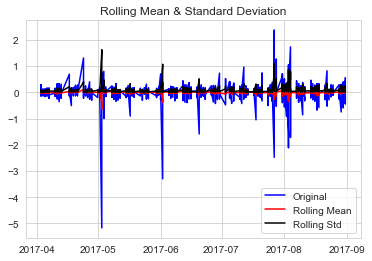


Augmented Dickey-Fuller Test:
ADF Test Statistic : -31.05566224463256
p-value : 0.0
#Lags Used : 38
Number of Observations Used : 41226
Crtical 1% : value -3.4305086306509716
Crtical 5% : value -2.861610111161057
Crtical 10% : value -2.5668073179094897
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [50]:
test_stationarity(df_ADP['First_Difference'])
#Now subtract the rolling mean from the original series

#### Seasonal Decomposition

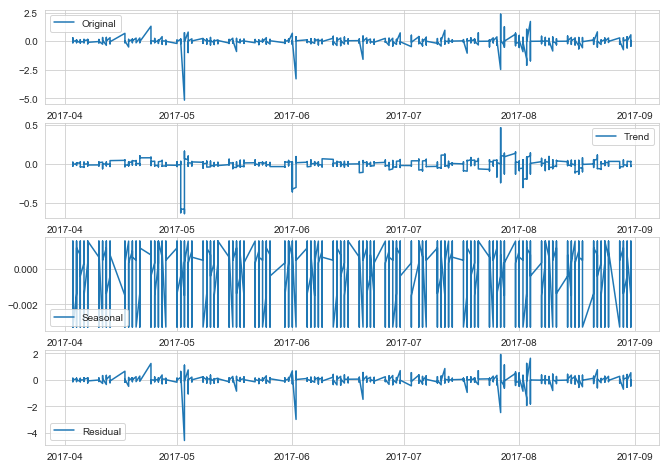

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_ADP['First_Difference'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_ADP['First_Difference'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

#### Note:
The data for NASDAQ.ADP is seasonal as interpreted from the seasonal plot of seasonal decomposition.

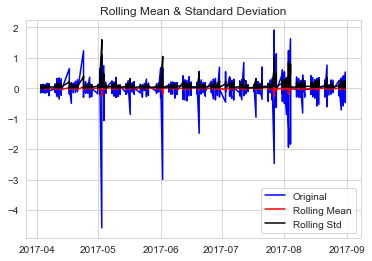


Augmented Dickey-Fuller Test:
ADF Test Statistic : -57.848665441138344
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41197
Crtical 1% : value -3.4305087423235587
Crtical 5% : value -2.861610160516496
Crtical 10% : value -2.566807344180027
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [52]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


#### Note :
This is stationary because:
    
• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time

#### Autocorrelation and Partial Corelation plot

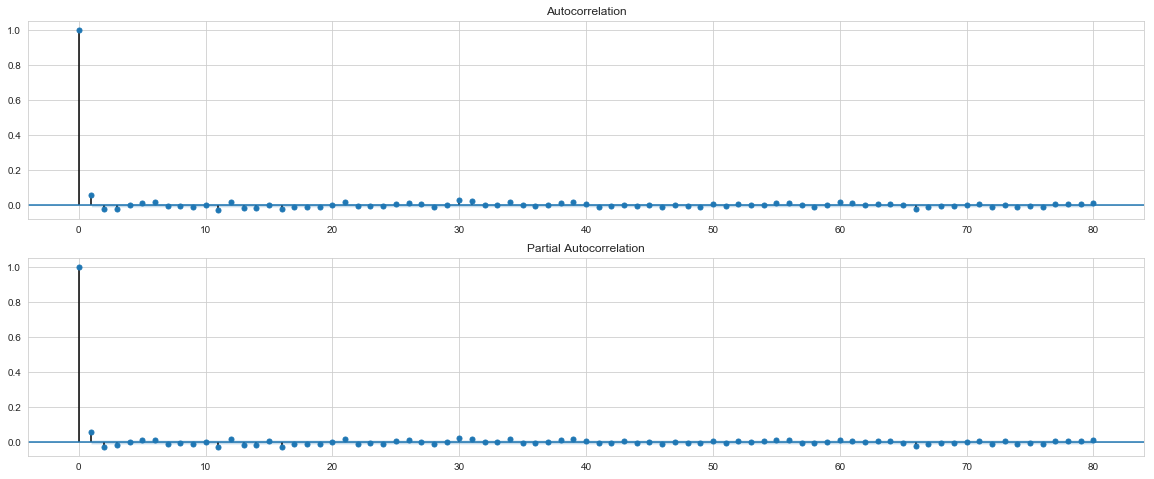

In [53]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ADP['First_Difference'].iloc[38:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ADP['First_Difference'].iloc[38:], lags=80, ax=ax2)

In [54]:
lag_acf = acf(df_ADP['First_Difference'],nlags=80)
lag_pacf = pacf(df_ADP['First_Difference'],nlags=80,method='ols')

Text(0.5,1,'Partial Autocorrelation')

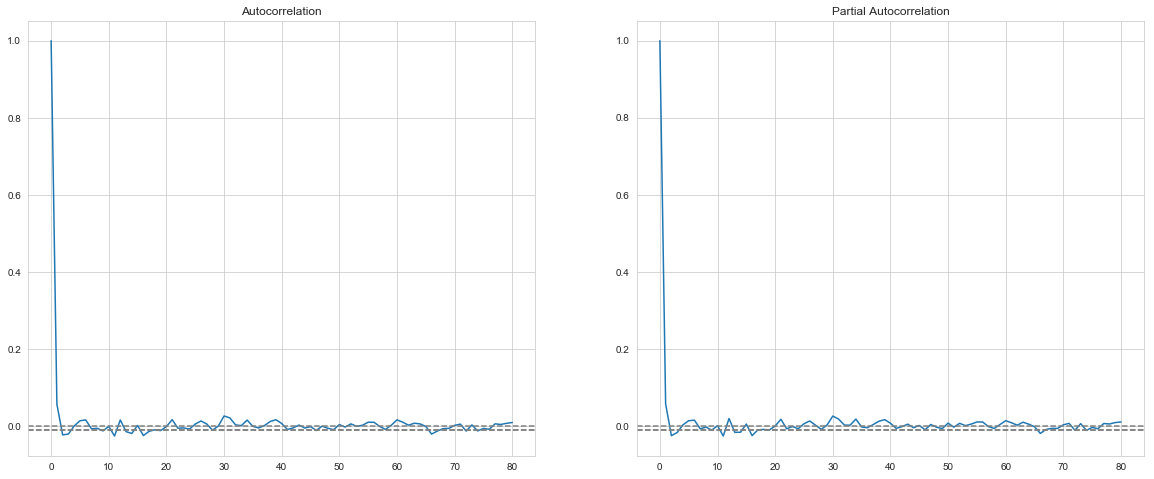

In [55]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_ADP['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')


#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:
    
• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.
    
• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.

In [56]:
model= sm.tsa.statespace.SARIMAX(df_ADP['NASDAQ.ADP'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                         NASDAQ.ADP   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               34733.013
Date:                            Mon, 08 Apr 2019   AIC                         -69464.026
Time:                                    23:28:13   BIC                         -69455.399
Sample:                                         0   HQIC                        -69461.299
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0109   5.34e-06   2036.759      0.000       0.011       0.011
Ljung-Box (Q):                    1

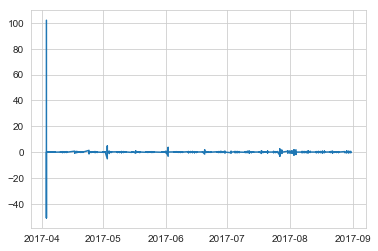

In [57]:
plt.plot(results.resid)

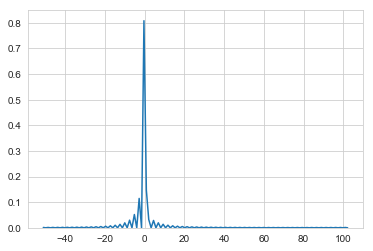

In [58]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(results.resid)


In [59]:
df_ADP['Forecast'] = results.predict()

In [60]:
df_ADP[['NASDAQ.ADP','Forecast']].tail()

,NASDAQ.ADP,Forecast
Month,,
2017-08-31,106.565,106.705
2017-08-31,106.590,106.525
2017-08-31,106.520,106.510
2017-08-31,106.400,106.480
2017-08-31,106.470,106.430


In [61]:
results.forecast(steps=10)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    106.470
41266    106.470
41267    106.440
41268    106.380
41269    106.440
41270    106.420
41271    106.450
41272    106.385
41273    106.410
41274    106.340
dtype: float64

In [62]:
results.predict(start=41264,end=41275)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    106.430
41265    106.470
41266    106.470
41267    106.440
41268    106.380
41269    106.440
41270    106.420
41271    106.450
41272    106.385
41273    106.410
41274    106.340
41275    106.220
dtype: float64

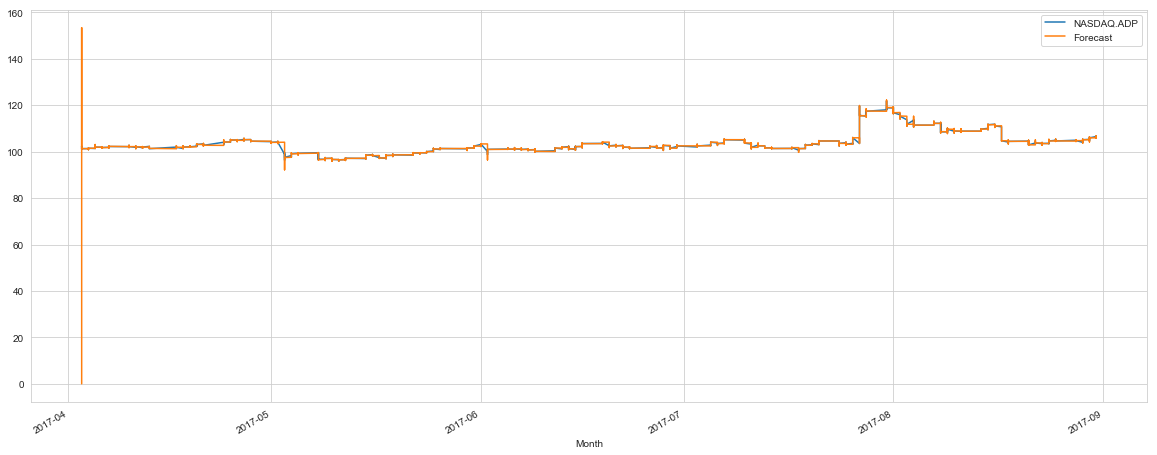

In [63]:
df_ADP[['NASDAQ.ADP','Forecast']].plot(figsize=(20,8))

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(df_ADP['NASDAQ.ADP'],df_ADP['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.3267938112781558
Mean Absolute Error NASDAQ.AAPL - 0.053396738052189766


### Times Series Forecasting for 'NASDAQ.CBOE'

       Month  NASDAQ.CBOE
0 2017-04-03        81.03
1 2017-04-03        81.21
2 2017-04-03        81.21
3 2017-04-03        81.13
4 2017-04-03        81.12
            NASDAQ.CBOE
Month                  
2017-04-03        81.03
2017-04-03        81.21
2017-04-03        81.21
2017-04-03        81.13
2017-04-03        81.12


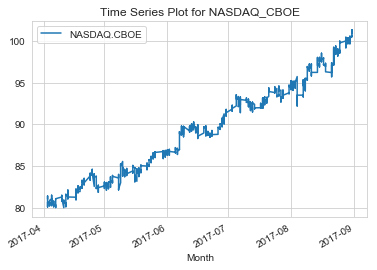

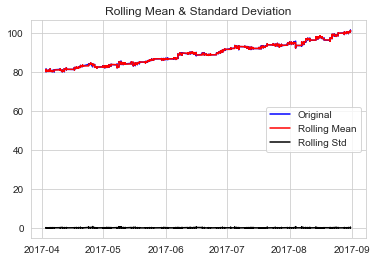


Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.16633930282613515
p-value : 0.9703092030510067
#Lags Used : 27
Number of Observations Used : 41238
Crtical 1% : value -3.430508584487571
Crtical 5% : value -2.8616100907584228
Crtical 10% : value -2.5668073070497304
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [65]:
df_CBOE= final[['Month',stock_features[2]]]
print(df_CBOE.head())
df_CBOE.set_index('Month',inplace=True)
print(df_CBOE.head())

df_CBOE.plot()
plt.title('Time Series Plot for NASDAQ_CBOE')
plt.show()
#test Stationarity
test_stationarity(df_CBOE['NASDAQ.CBOE'])


### MAKING THE TIME SERIES STATIONARY


#### Differencing

In [66]:
df_CBOE = df_CBOE.copy()

In [67]:
df_CBOE.head()

,NASDAQ.CBOE
Month,
2017-04-03,81.03
2017-04-03,81.21
2017-04-03,81.21
2017-04-03,81.13
2017-04-03,81.12


In [68]:
df_CBOE['First_Difference'] = df_CBOE['NASDAQ.CBOE'] - df_CBOE['NASDAQ.CBOE'].shift(1)
df_CBOE.head()

,NASDAQ.CBOE,First_Difference
Month,,
2017-04-03,81.03,NaN
2017-04-03,81.21,0.18
2017-04-03,81.21,0.00
2017-04-03,81.13,-0.08
2017-04-03,81.12,-0.01


In [69]:
df_CBOE.dropna(inplace=True)

#### Test Seasonality

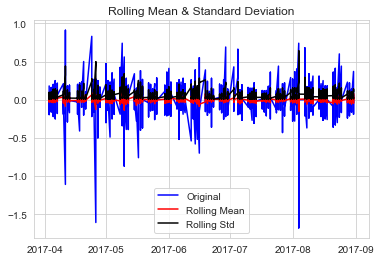


Augmented Dickey-Fuller Test:
ADF Test Statistic : -41.64209364543113
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 41238
Crtical 1% : value -3.430508584487571
Crtical 5% : value -2.8616100907584228
Crtical 10% : value -2.5668073070497304
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [70]:
test_stationarity(df_CBOE['First_Difference'])

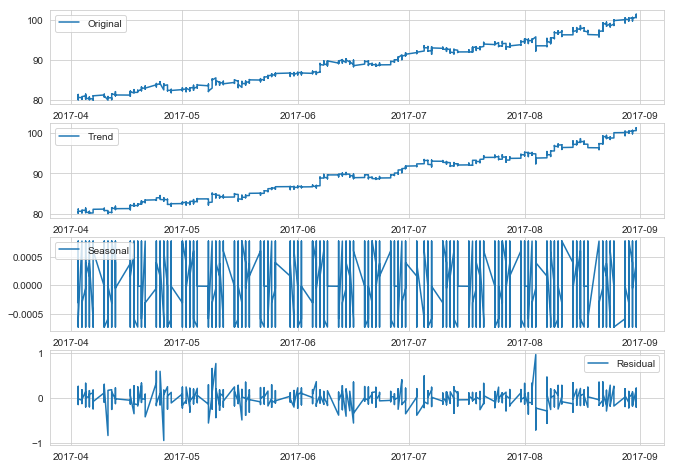

In [71]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_CBOE['NASDAQ.CBOE'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_CBOE['NASDAQ.CBOE'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')


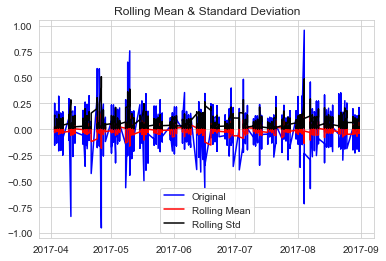


Augmented Dickey-Fuller Test:
ADF Test Statistic : -46.216720532158014
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41197
Crtical 1% : value -3.4305087423235587
Crtical 5% : value -2.861610160516496
Crtical 10% : value -2.566807344180027
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [72]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

#### Note :
This is stationary because:
    
• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time

#### Autocorrelation and Partial Corelation plot

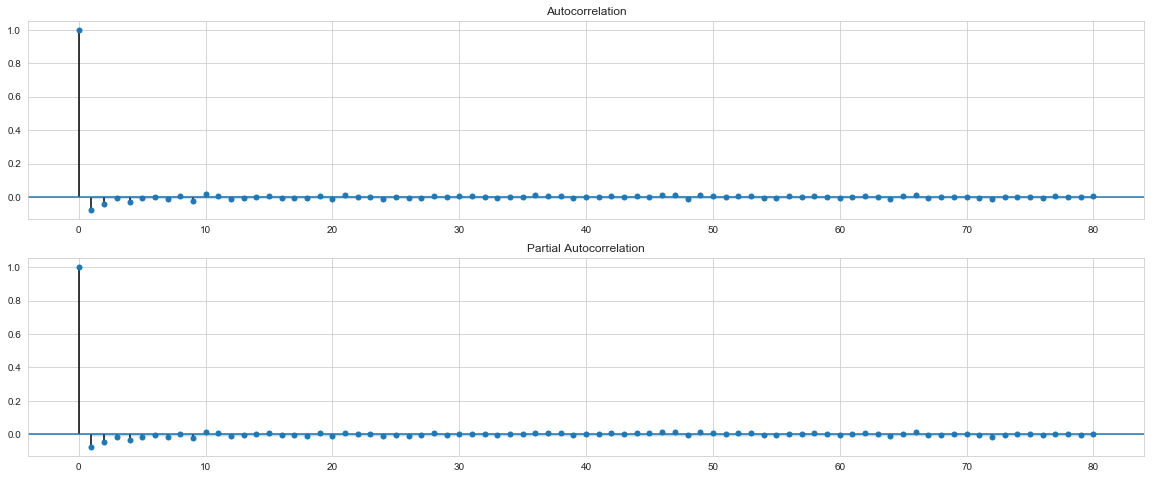

In [73]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CBOE['First_Difference'].iloc[26:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CBOE['First_Difference'].iloc[26:], lags=80, ax=ax2)

In [74]:
lag_acf = acf(df_CBOE['First_Difference'],nlags=80)
lag_pacf = pacf(df_CBOE['First_Difference'],nlags=80,method='ols')

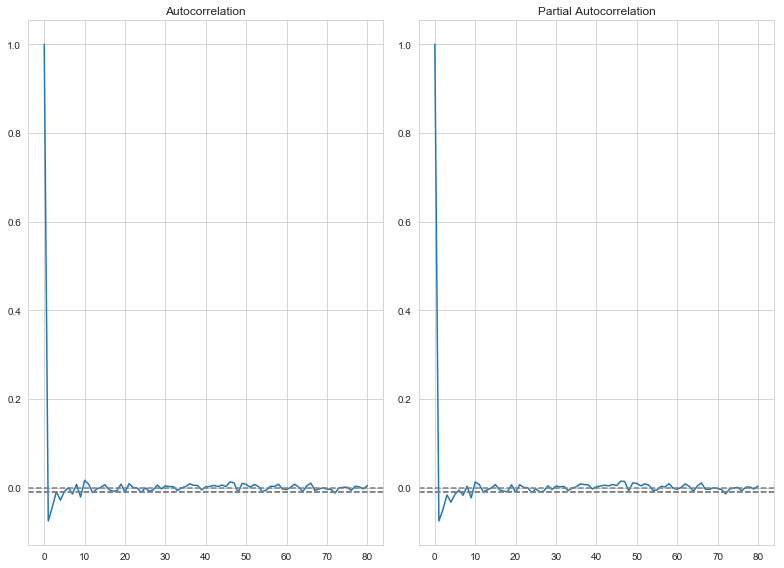

In [75]:
plt.figure(figsize=(11,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CBOE['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

plt.tight_layout()


#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:
    
• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.
    
• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.



C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.CBOE   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               53414.092
Date:                            Mon, 08 Apr 2019   AIC                        -106826.184
Time:                                    23:29:33   BIC                        -106817.556
Sample:                                         0   HQIC                       -106823.457
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0044   5.33e-06    824.257      0.000       0.004       0.004
Ljung-Box (Q):                    1

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    100.84
dtype: float64


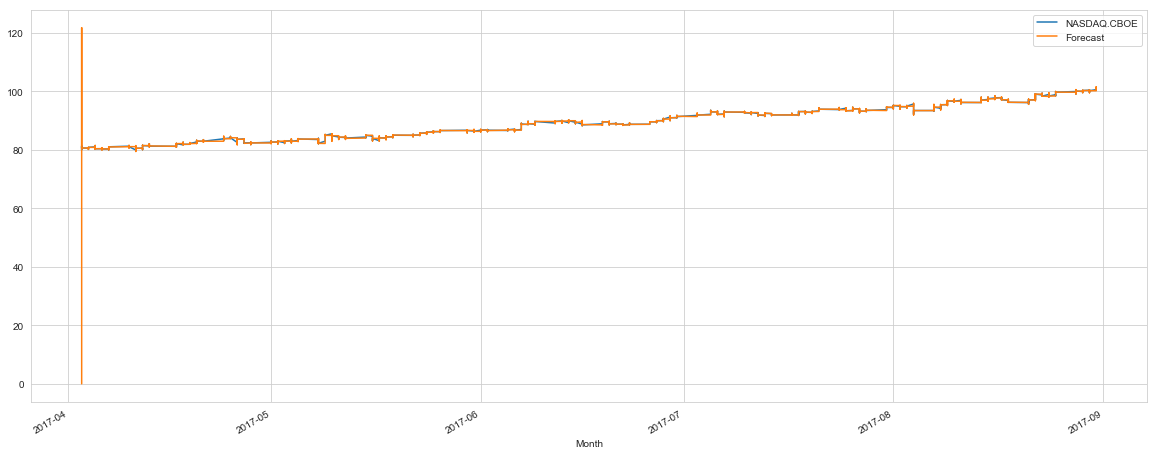

In [76]:
# fit model
model= sm.tsa.statespace.SARIMAX(df_CBOE['NASDAQ.CBOE'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
print(results.forecast())
df_CBOE['Forecast'] = results.predict()
df_CBOE[['NASDAQ.CBOE','Forecast']].plot(figsize=(20,8))
plt.show()

In [77]:
results.forecast(steps=10)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    100.8400
41266    100.8900
41267    100.9100
41268    100.8700
41269    100.8800
41270    100.8700
41271    100.8799
41272    100.8800
41273    100.8700
41274    100.8500
dtype: float64

In [78]:
results.predict(start=41264,end=41273)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    100.8200
41265    100.8400
41266    100.8900
41267    100.9100
41268    100.8700
41269    100.8800
41270    100.8700
41271    100.8799
41272    100.8800
41273    100.8700
dtype: float64

In [79]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CBOE -', mean_squared_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))
print('Mean Absolute Error NASDAQ.CBOE -', mean_absolute_error(df_CBOE['NASDAQ.CBOE'],df_CBOE['Forecast']))

Mean Squared Error NASDAQ.CBOE - 0.20399400198196685
Mean Absolute Error NASDAQ.CBOE - 0.04356630558843415


### Time Series ForeCasting for 'NASDAQ.CSCO'

       Month  NASDAQ.CSCO
0 2017-04-03      33.7400
1 2017-04-03      33.8800
2 2017-04-03      33.9000
3 2017-04-03      33.8499
4 2017-04-03      33.8400
            NASDAQ.CSCO
Month                  
2017-04-03      33.7400
2017-04-03      33.8800
2017-04-03      33.9000
2017-04-03      33.8499
2017-04-03      33.8400


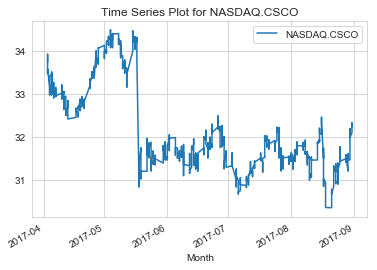

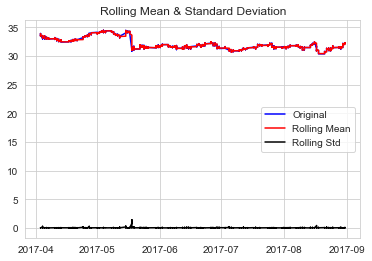


Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.395554610889455
p-value : 0.14299501995164637
#Lags Used : 47
Number of Observations Used : 41218
Crtical 1% : value -3.430508661441506
Crtical 5% : value -2.8616101247694137
Crtical 10% : value -2.566807325152842
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [80]:
df_CSCO = final[['Month',stock_features[3]]]
print(df_CSCO.head())
df_CSCO.set_index('Month',inplace=True)
print(df_CSCO.head())
df_CSCO.plot()
plt.title("Time Series Plot for NASDAQ.CSCO")
plt.show()
#Test Staionarity
test_stationarity(df_CSCO['NASDAQ.CSCO'])



### MAKING TIME SERIES STATIONARY

#### Differencing

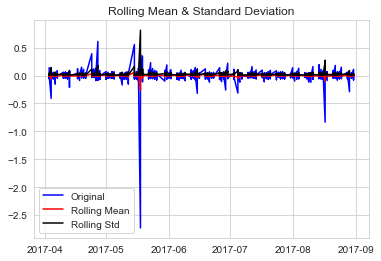


Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.356682532566698
p-value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
Crtical 1% : value -3.430508661441506
Crtical 5% : value -2.8616101247694137
Crtical 10% : value -2.566807325152842
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [81]:
df_CSCO = df_CSCO.copy()
df_CSCO['First_Difference'] = df_CSCO['NASDAQ.CSCO'] - df_CSCO['NASDAQ.CSCO'].shift(1)
df_CSCO.dropna(inplace=True)
test_stationarity(df_CSCO['First_Difference'])

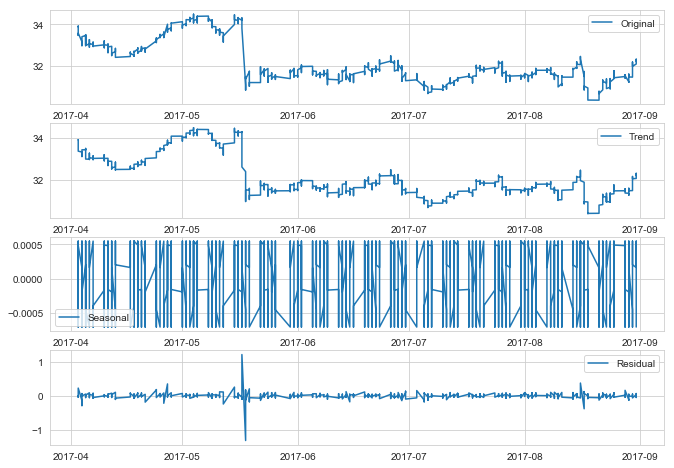

In [82]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_CSCO['NASDAQ.CSCO'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_CSCO['NASDAQ.CSCO'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')


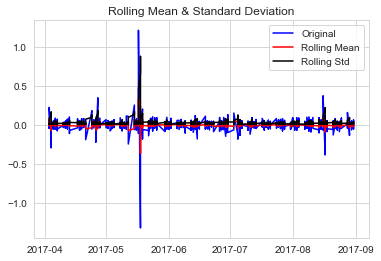


Augmented Dickey-Fuller Test:
ADF Test Statistic : -43.94517780543632
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41197
Crtical 1% : value -3.4305087423235587
Crtical 5% : value -2.861610160516496
Crtical 10% : value -2.566807344180027
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [83]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

#### Note :
This is stationary because:
    
• test statistic is lower than critical values.

• the mean and std variations have small variations with time

### Auto Corealtion and Partial Autocorelation Plots

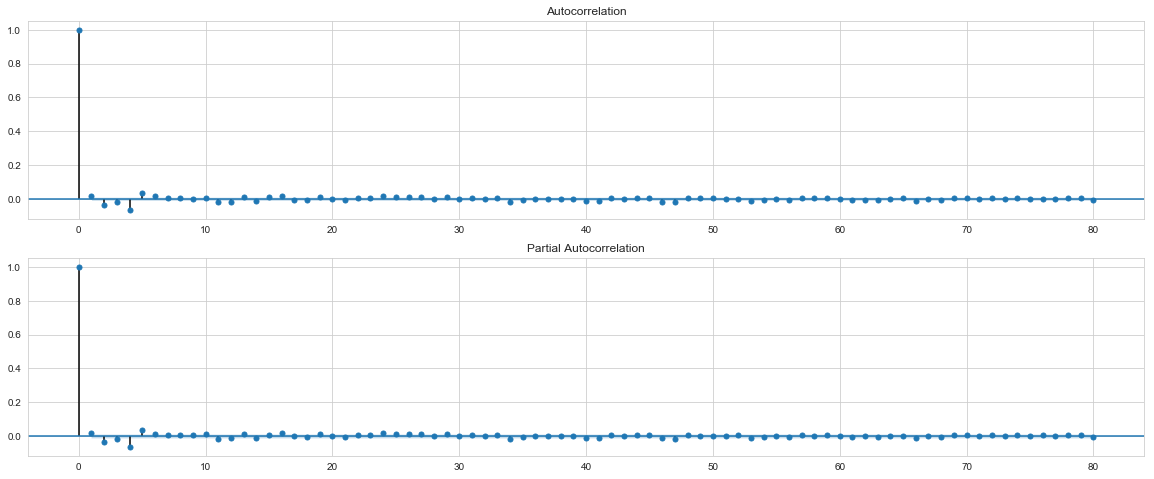

In [84]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_CSCO['First_Difference'].iloc[46:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_CSCO['First_Difference'].iloc[46:], lags=80, ax=ax2)

In [85]:
lag_acf = acf(df_CSCO['First_Difference'],nlags=80)
lag_pacf = pacf(df_CSCO['First_Difference'],nlags=80,method='ols')


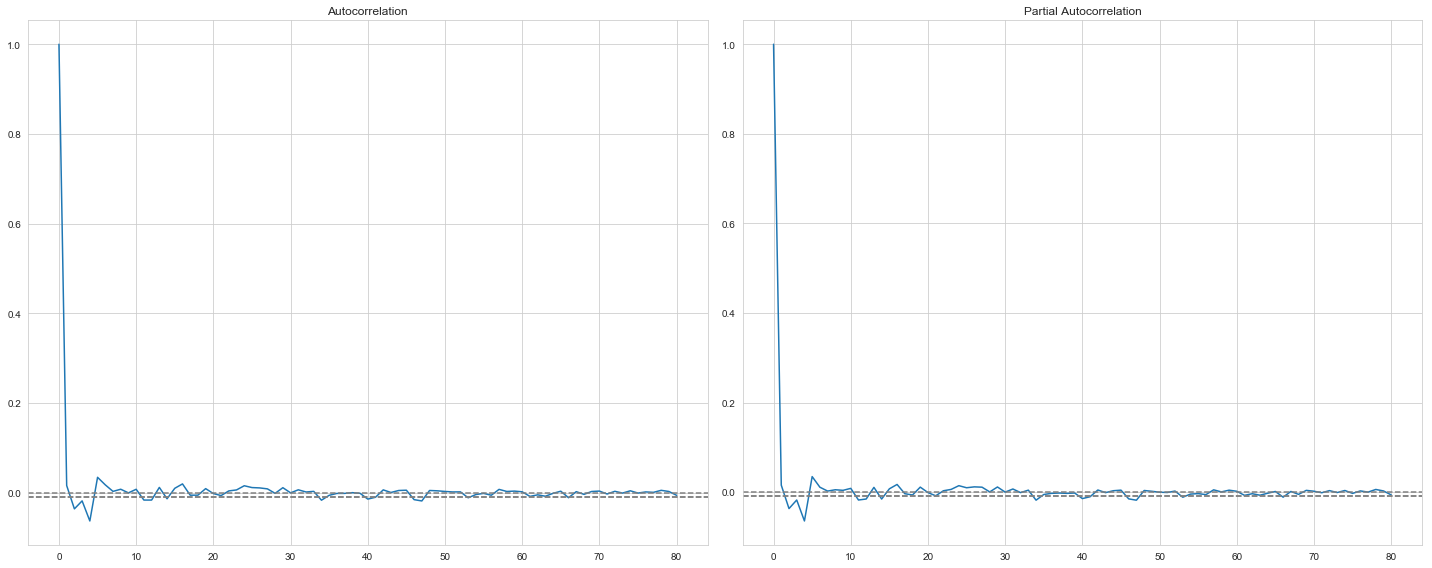

In [86]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_CSCO['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

plt.tight_layout()



#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:
    
• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.
    
• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.


C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.CSCO   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               85502.595
Date:                            Mon, 08 Apr 2019   AIC                        -171003.190
Time:                                    23:30:54   BIC                        -170994.563
Sample:                                         0   HQIC                       -171000.463
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   1.54e-07   6012.819      0.000       0.001       0.001
Ljung-Box (Q):                    1

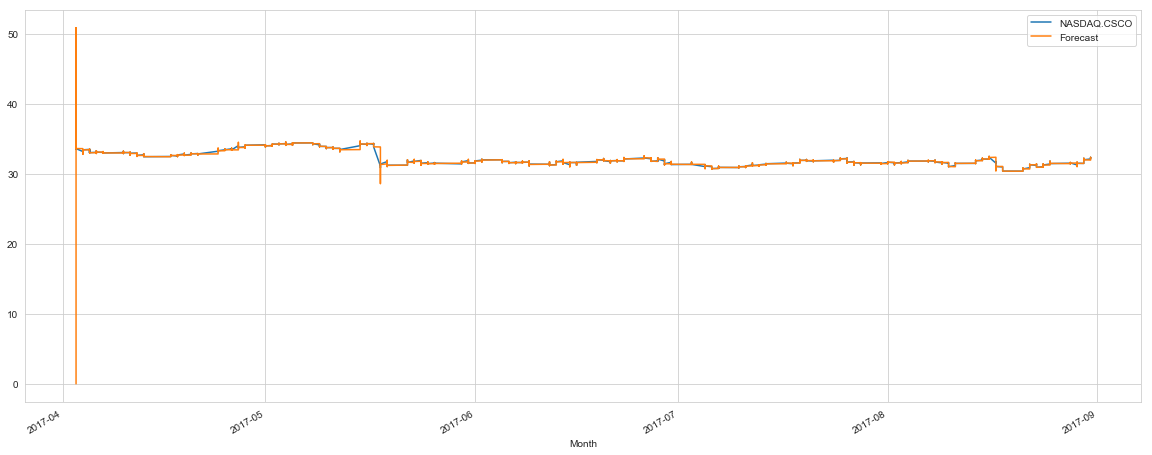

In [87]:
# fit model
model= sm.tsa.statespace.SARIMAX(df_CSCO['NASDAQ.CSCO'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
df_CSCO['Forecast'] = results.predict()
df_CSCO[['NASDAQ.CSCO','Forecast']].plot(figsize=(20,8))
plt.show()

In [88]:
df_CSCO.head()

,NASDAQ.CSCO,First_Difference,Forecast
Month,,,
2017-04-03,33.8800,0.1400,0.0000
2017-04-03,33.9000,0.0200,33.8800
2017-04-03,33.8499,-0.0501,33.9000
2017-04-03,33.8400,-0.0099,33.8499
2017-04-03,33.8800,0.0400,33.8400


In [89]:
results.forecast(steps=10)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    32.225
41266    32.190
41267    32.170
41268    32.150
41269    32.180
41270    32.170
41271    32.150
41272    32.165
41273    32.180
41274    32.180
dtype: float64

In [90]:
results.predict(start=41264,end=41275)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    32.195
41265    32.225
41266    32.190
41267    32.170
41268    32.150
41269    32.180
41270    32.170
41271    32.150
41272    32.165
41273    32.180
41274    32.180
41275    32.175
dtype: float64

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CSCO -', mean_squared_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))
print('Mean Absolute Error NASDAQ.CSCO -', mean_absolute_error(df_CSCO['NASDAQ.CSCO'],df_CSCO['Forecast']))

Mean Squared Error NASDAQ.CSCO - 0.03569378449696079
Mean Absolute Error NASDAQ.CSCO - 0.015775407730929066


### Time Series Forecasting for NASDAQ.EBAY

       Month  NASDAQ.EBAY
0 2017-04-03      33.3975
1 2017-04-03      33.3950
2 2017-04-03      33.4100
3 2017-04-03      33.3350
4 2017-04-03      33.4000
            NASDAQ.EBAY
Month                  
2017-04-03      33.3975
2017-04-03      33.3950
2017-04-03      33.4100
2017-04-03      33.3350
2017-04-03      33.4000


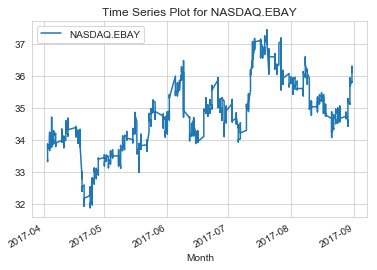

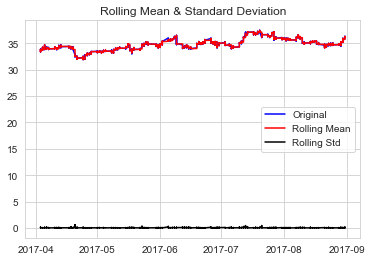


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.8757616359411922
p-value : 0.3435480878025817
#Lags Used : 47
Number of Observations Used : 41218
Crtical 1% : value -3.430508661441506
Crtical 5% : value -2.8616101247694137
Crtical 10% : value -2.566807325152842
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [92]:
df_EBAY = final[['Month',stock_features[4]]]
print(df_EBAY.head())
df_EBAY.set_index('Month',inplace=True)
print(df_EBAY.head())
df_EBAY.plot()
plt.title("Time Series Plot for NASDAQ.EBAY")
plt.show()
#Test Staionarity
test_stationarity(df_EBAY['NASDAQ.EBAY'])

### MAKING TIME SERIES STATIONARY

#### Differencing

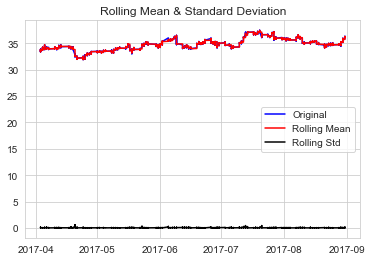


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.8639133106572756
p-value : 0.3492231149992877
#Lags Used : 47
Number of Observations Used : 41217
Crtical 1% : value -3.4305086652911636
Crtical 5% : value -2.8616101264708296
Crtical 10% : value -2.5668073260584587
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [93]:
df_EBAY = df_EBAY.copy()
df_EBAY['First_Difference'] = df_EBAY['NASDAQ.EBAY'] - df_EBAY['NASDAQ.EBAY'].shift(1)
df_EBAY.dropna(inplace=True)
#test Stationarity
test_stationarity(df_EBAY['NASDAQ.EBAY'])

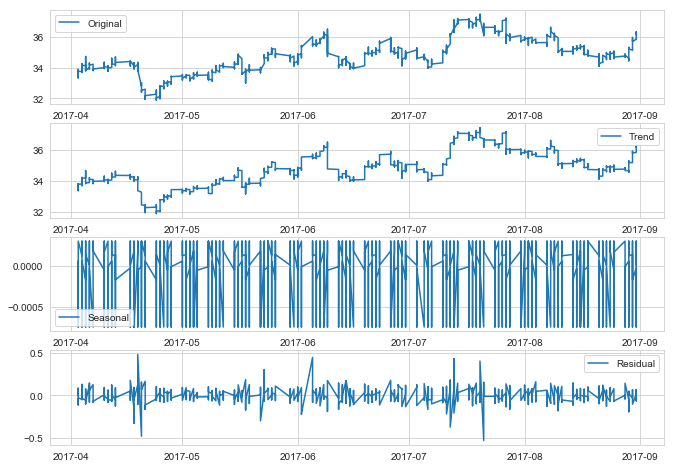

In [94]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(df_EBAY['NASDAQ.EBAY'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(df_EBAY['NASDAQ.EBAY'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')


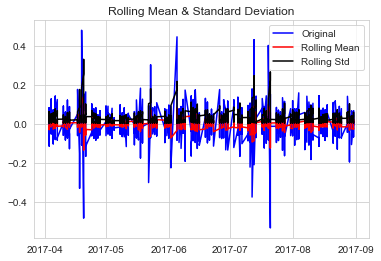


Augmented Dickey-Fuller Test:
ADF Test Statistic : -44.88049175892065
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41197
Crtical 1% : value -3.4305087423235587
Crtical 5% : value -2.861610160516496
Crtical 10% : value -2.566807344180027
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [95]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


#### Note :
This is stationary because:
    
• test statistic is lower than critical values.

• the mean and std variations have small variations with time


### Autocorealtion plot and Partial Autocorelation plots

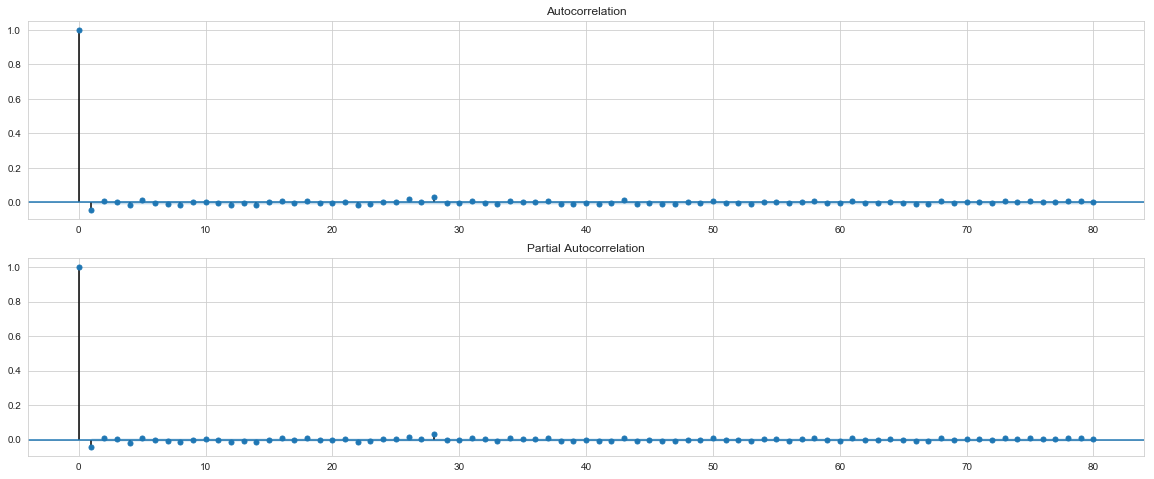

In [96]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_EBAY['First_Difference'].iloc[47:], lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_EBAY['First_Difference'].iloc[47:], lags=80, ax=ax2)

In [97]:


lag_acf = acf(df_EBAY['First_Difference'],nlags=80)
lag_pacf = pacf(df_EBAY['First_Difference'],nlags=80,method='ols')

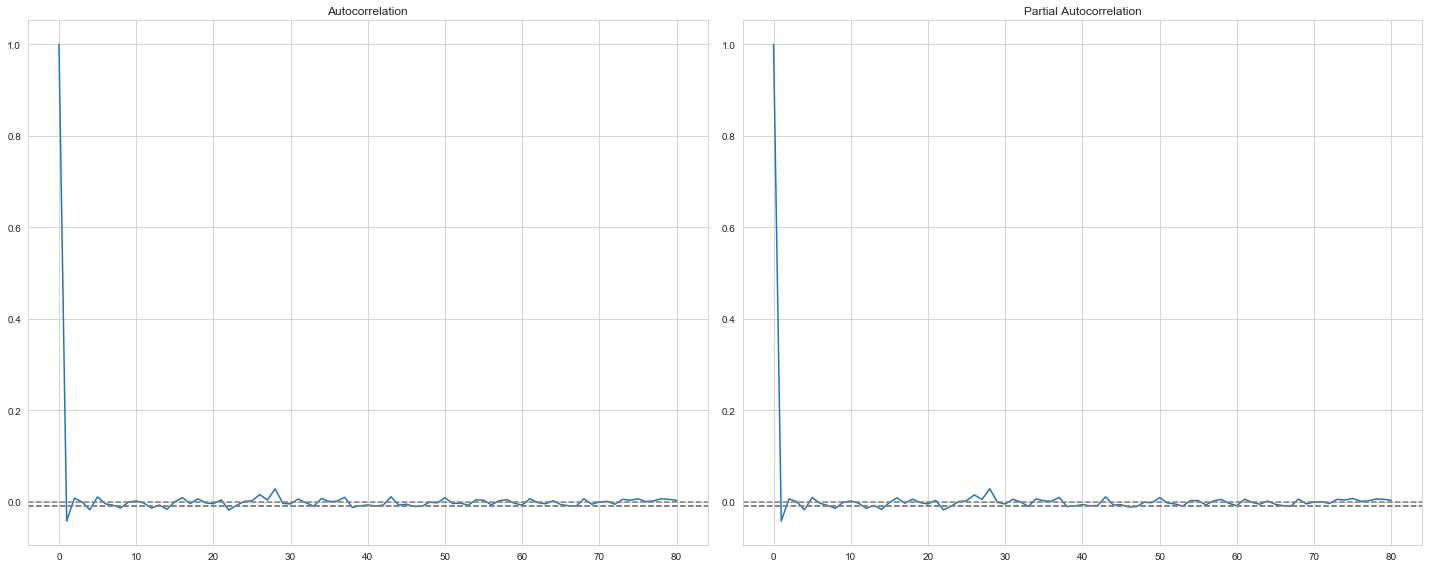

In [98]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_EBAY['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

plt.tight_layout()


#### Note
The two dotted lines on either sides of 0 are the confidence intervals. 

These can be used to determine the ‘p’ and ‘q’ values as:
    
• p: The first time where the PACF crosses the upper confidence interval, here its close to 0. hence p = 0.
    
• q: The first time where the ACF crosses the upper confidence interval, here its close to 0. hence p = 0.

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.EBAY   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               82104.712
Date:                            Mon, 08 Apr 2019   AIC                        -164207.424
Time:                                    23:32:13   BIC                        -164198.797
Sample:                                         0   HQIC                       -164204.697
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   9.43e-07   1158.801      0.000       0.001       0.001
Ljung-Box (Q):                    1

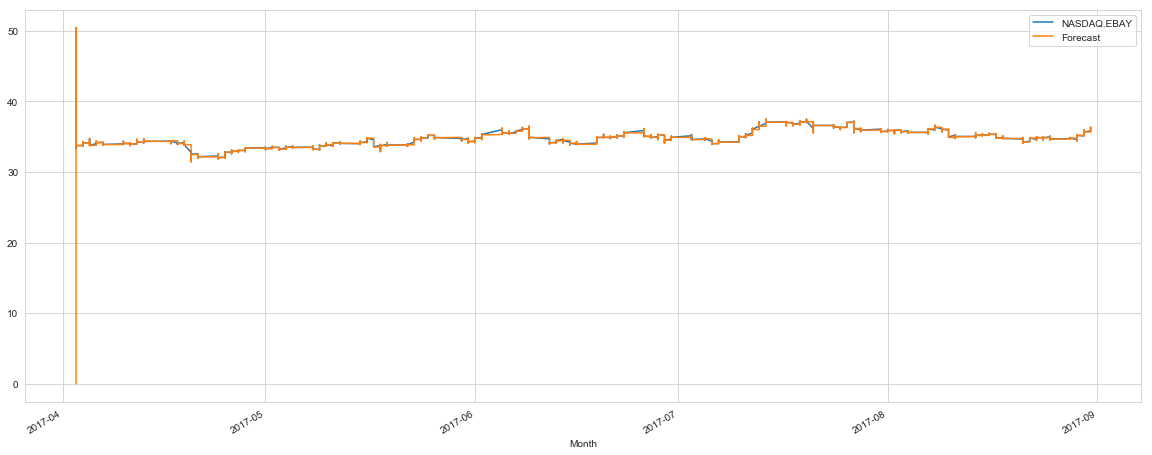

In [99]:
# fit model
model= sm.tsa.statespace.SARIMAX(df_EBAY['NASDAQ.EBAY'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
df_EBAY['Forecast'] = results.predict()
df_EBAY[['NASDAQ.EBAY','Forecast']].plot(figsize=(20,8))
plt.show()

In [100]:
df_EBAY.head()

,NASDAQ.EBAY,First_Difference,Forecast
Month,,,
2017-04-03,33.395,-0.0025,0.000
2017-04-03,33.410,0.0150,33.395
2017-04-03,33.335,-0.0750,33.410
2017-04-03,33.400,0.0650,33.335
2017-04-03,33.430,0.0300,33.400


In [101]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.EBAY -', mean_squared_error(df_EBAY['NASDAQ.EBAY'],df_EBAY['Forecast']))
print('Mean Absolute Error NASDAQ.EBAY -', mean_absolute_error(df_EBAY['NASDAQ.EBAY'],df_EBAY['Forecast']))

Mean Squared Error NASDAQ.EBAY - 0.03483567895780386
Mean Absolute Error NASDAQ.EBAY - 0.02168803364035607


In [102]:
results.forecast(steps=10)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    36.090
41266    36.030
41267    36.030
41268    36.020
41269    36.020
41270    36.025
41271    36.020
41272    36.025
41273    36.020
41274    36.020
dtype: float64

In [103]:
 results.predict(start=41265,end=41275)

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    36.090
41266    36.030
41267    36.030
41268    36.020
41269    36.020
41270    36.025
41271    36.020
41272    36.025
41273    36.020
41274    36.020
41275    36.010
dtype: float64

### CONCLUSION : The predicted stock prices values have been stored in the Forecast Columns of the each stock entity dataframe
